# Linge & Langtagen, "Programming for Computations"
## Ch. 3.3 The composite midpoint method

$The$ $idea.$ Rather tahn approximating the area under a curve by trapezoids, we can use plain rectangles. 

It may sound less accurate to use horizontal lines and not skew lines following the function to be integrated, but an integration method based on rectangles (the $midpoint$ $method$) is in fact slightly more accurate than the one based on trapezoids!


In the midpoint method, we construct a rectangle for every sub-interval where the height equals $f$ at the midpoint of the sub-interval.

Let us do this for four rectangles, using the same sub-intervals.

$$\int_0^1f(t)dt \approx h_{1}f(\frac{0 + 0.2}{2}) + h_{2}f(\frac{0.2 + 0.4}{2}) + h_{3}f(\frac{0.4 + 0.6}{2}) + h_{4}f(\frac{0.6 + 0.8}{2}) + h_{5}f(\frac{0.8 + 1.0}{2}), $$

where $h_{1}$, $h_{2}$, $h_{3}$, $h_{4}$ and $h_{5}$ are the widths of the sub-intervals.

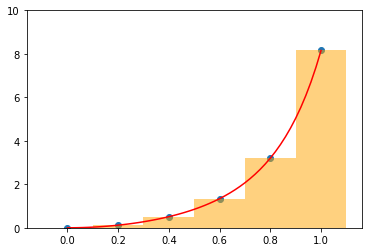

::: Midpoint :::
1.850852345028698
-----------------------------
::: Exact :::
1.718281828459045
-----------------------------


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll

t1 = np.linspace(0,1,51)
y1 = 3*t1**2*np.exp(t1**3)

t2 = np.linspace(0,1,6)
F1 = lambda t: 3*t**2*np.exp(t**3)
y2 = []

for i in t2:
    val = F1(i)
    y2.append(val)

h = (float(t2[-1])-float(t2[0]))/(len(t2)-1)

plt.plot(t1,y1, 'r-')
plt.scatter(t2, y2)
plt.bar(t2, y2, width=h, alpha=0.5,facecolor='orange')
plt.ylim(0,10)
plt.show()

sum = 0
for i in range(len(t2)-1):
    sum += h*0.5*(y2[i] + y2[i+1])

F2 = lambda t: np.exp(t**3)
exact = F2(1) - F2(0)

print("::: Midpoint :::")
print(sum)
print("-----------------------------")

print("::: Exact :::")
print(exact)
print("-----------------------------")

### Ch. 3.3.1 The general formula

Let us derive a formula for the midpoint method based on $n$ rectangles of equal width:

$$\int_a^bf(x)dx = \int_{x_0}^{x_1}f(x)dx + \int_{x_1}^{x_2}f(x)dx + \ldots + \int_{x_{n-1}}^{x_n}f(x)dx,$$

$$\approx hf\left(\frac{x_{0}+x_{1}}{2}\right) + hf\left(\frac{x_{1}+x_{2}}{2}\right) + \ldots + hf\left(\frac{x_{n-1}+x_{n}}{2}\right), $$

$$\approx h\left(f\left(\frac{x_{0}+x_{1}}{2}\right) + f\left(\frac{x_{1}+x_{2}}{2}\right) + \ldots + f\left(\frac{x_{n-1}+x_{n}}{2}\right)\right), $$

This sum may be written more compactly as

$$\int_a^bf(x)dx \approx h\sum_{i=0}^{n-1} f(x_{i}),$$


where $x_{i} = \left(a + \frac{h}{2}\right) + ih.$

### Ch. 3.3.2 Implementation

We follow the advice and lessons learned from the implementation of the trapezoidal method and make a function $midopoint$($f$, $a$, $b$, $n$) for implementing the general formula.

In [32]:
from trapezoidal import trapezoidal

def midpoint(f, a, b, n):
    h = float(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

F1 = lambda t: 3*t**2*np.exp(t**3)
F2 = lambda t: np.exp(t**3)

p1 = midpoint(F1, 0, 1, 4)
p2 = trapezoidal(F1, 0, 1, 4)

exact = F2(1) - F2(0)

print("::: Midpoint :::")
print(p1)
print("-----------------------------")

print("::: Trapezoidal :::")
print(p2)
print("-----------------------------")

print("::: Exact :::")
print(exact)
print("-----------------------------")

::: Midpoint :::
1.618975137808381
-----------------------------
::: Trapezoidal :::
1.9227167504675762
-----------------------------
::: Exact :::
1.718281828459045
-----------------------------


We can test the function as we explained for thje similar $trapezoidal$ method. The error in our particular problem $\int_0^1 3t^2 e^{t^{3}}dt$ with four intervals is now about 0.1 in contrast to 0.2 for the trapezoidal rule.

Thie is in fact not accidental: one can show mathematically that the error of the midpoint method is a bit smaller than for the trapezoidal method.

The differences are seldom of any practical importance, and on a lapto we can easily use $n = 10^{6}$ and get the answer with an error about $10^{-12}$ in a couple of seconds.

### Ch. 3.3.3 Comparing the trapezoidal and the midpoint methods

The next exampl;e sohws how easy we can combine the $trapezoidal$ and $midpoint$ functions to make a comparison of the two methods in the file compare_integration_metods.py:

In [36]:
from trapezoidal import trapezoidal
from midpoint import midpoint
from math import exp

g = lambda y: exp(-y**2)
a = 0
b = 2
print('    n          midpoint            trapezoidal')
for i in range(1, 21):
    n = 2**i
    m = midpoint(g, a, b, n)
    t = trapezoidal(g, a, b, n)
    print('%7d    %.16f    %.16f' % (n, m, t))


    n          midpoint            trapezoidal
      2    0.8842000076332692    0.8770372606158094
      4    0.8827889485397279    0.8806186341245393
      8    0.8822686991994210    0.8817037913321336
     16    0.8821288703366458    0.8819862452657772
     32    0.8820933014203766    0.8820575578012112
     64    0.8820843709743319    0.8820754296107942
    128    0.8820821359746071    0.8820799002925637
    256    0.8820815770754198    0.8820810181335849
    512    0.8820814373412922    0.8820812976045025
   1024    0.8820814024071774    0.8820813674728968
   2048    0.8820813936736116    0.8820813849400392
   4096    0.8820813914902204    0.8820813893068272
   8192    0.8820813909443684    0.8820813903985197
  16384    0.8820813908079066    0.8820813906714446
  32768    0.8820813907737911    0.8820813907396778
  65536    0.8820813907652575    0.8820813907567422
 131072    0.8820813907631487    0.8820813907610036
 262144    0.8820813907625702    0.8820813907620528
 524288    0.8820

A visual insepction of the numbers shows how fast the digits stablize in both methods. It appears that 13 digits have stabilized in the last two rows.